<a href="https://colab.research.google.com/github/entenam/TF-Intro/blob/main/Introduction_to_TF_for_AI_W3Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('accuracy')>0.90):
      print('\nReached 99% Accuracy.... Stopping')
      self.model.stop_training = True

callback = myCallback()

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
testing_images = testing_images.reshape(10000,28,28,1)
(training_images, testing_images) = (training_images/255, testing_images/255)
print(training_images.shape)

model = tf.keras.models.Sequential([
                             tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape = (28,28,1)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='Adam', loss = 'SparseCategoricalCrossentropy', metrics='accuracy')

model.fit(training_images, training_labels, epochs = 10, callbacks=[callback])

(test_loss, test_accuracy) = model.evaluate(testing_images, testing_labels)

print(test_loss, test_accuracy)

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if logs.get('accuracy') > 0.9:
      self.model.stop_training = True


callback = myCallback()

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

#print(training_images.shape, testing_images.shape)

(training_images, testing_images) = (training_images.reshape(60000, 28, 28, 1)/255, testing_images.reshape(10000, 28, 28, 1)/255)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

model.fit(training_images, training_labels, epochs=10, callbacks=[callback])

model.evaluate(testing_images, testing_labels)

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4454 - accuracy: 0.8383
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2953 - accuracy: 0.8923
Epoch 3/10
313/313 [==============================] - 4s 12ms/step - loss: 0.2760 - accuracy: 0.8968


[0.2760145664215088, 0.8967999815940857]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
print(testing_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


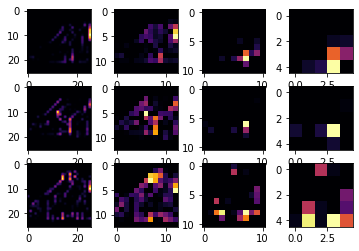

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)